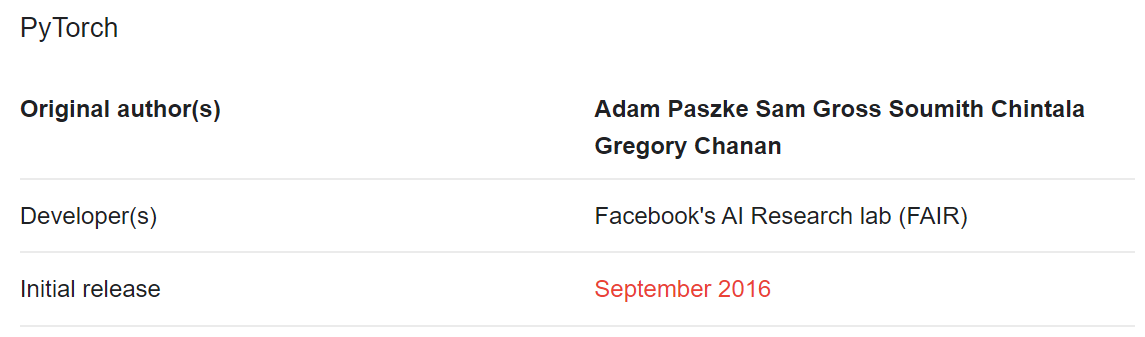

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
df_seeds = pd.read_csv('seeds_dataset.txt', 
                      header=None,
                     sep='\t')

df_seeds

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# label has to be start from 0 numeric data
le = preprocessing.LabelEncoder()
df_seeds.iloc[:,-1] = le.fit_transform(df_seeds.iloc[:,-1].values)
df_seeds

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [4]:
# normalize the data before training
# df_seeds.iloc[:,:-1] = df_seeds.iloc[:,:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

inputs = np.array(df_seeds)[:, :-1]
target = np.array(df_seeds)[:, -1].astype(int)

## Build NN based on Pytorch

In [5]:
class seedsNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, out_classes):
        # Here super() replace parent class nn.Module to inherit the class
        super(seedsNet, self).__init__()
        self.feed1 = nn.Linear(input_size, hidden1_size) # replace the X*W + b
        self.relu1 = nn.ReLU()
        self.feed2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.feed3 = nn.Linear(hidden2_size, out_classes)  
    
    def forward(self, x):
        hidden_1 = self.feed1(x)
        hidden_t1 = self.relu1(hidden_1)
        hidden_2 = self.feed2(hidden_t1)
        hidden_t2 = self.relu2(hidden_2)
        output = self.feed3(hidden_t2)
        return output

In [6]:
# show the network
net = seedsNet(7, 100, 50, 3)
print(net)

seedsNet(
  (feed1): Linear(in_features=7, out_features=100, bias=True)
  (relu1): ReLU()
  (feed2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (feed3): Linear(in_features=50, out_features=3, bias=True)
)


In [7]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1)

# How many instances have we got?
print('n_observations in training set: ', len(X_train))
print('n_observations in testing set: ', len(X_test))


X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train) 
train_tensor = torch.utils.data.TensorDataset(X_train, y_train) 

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test) 
test_tensor = torch.utils.data.TensorDataset(X_test, y_test)

# Create the dataloaders - for training and testing
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_tensor, batch_size=batch_size, num_workers=0)
test_loader  = torch.utils.data.DataLoader(dataset=test_tensor, batch_size=batch_size, num_workers=0)

n_observations in training set:  168
n_observations in testing set:  42


### sample of tensor

In [8]:
X_train[0]

tensor([18.8500, 16.1700,  0.9056,  6.1520,  3.8060,  2.8430,  6.2000],
       dtype=torch.float64)

In [16]:
y_train[0]

tensor(1, dtype=torch.int32)

In [9]:
X_train.shape

torch.Size([168, 7])

p: True
q: pred

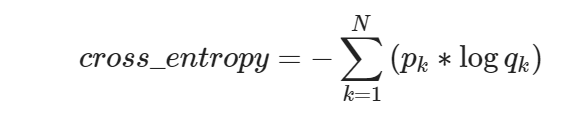

In [10]:
# Our model
net = seedsNet(7, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [11]:
# weight, bias
for param in net.parameters():
    print(type(param.data), param.size())

<class 'torch.Tensor'> torch.Size([100, 7])
<class 'torch.Tensor'> torch.Size([100])
<class 'torch.Tensor'> torch.Size([50, 100])
<class 'torch.Tensor'> torch.Size([50])
<class 'torch.Tensor'> torch.Size([3, 50])
<class 'torch.Tensor'> torch.Size([3])


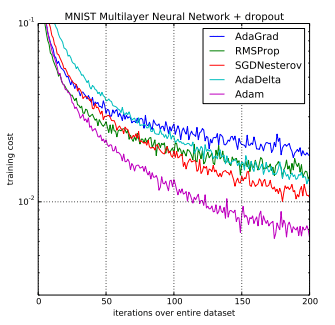

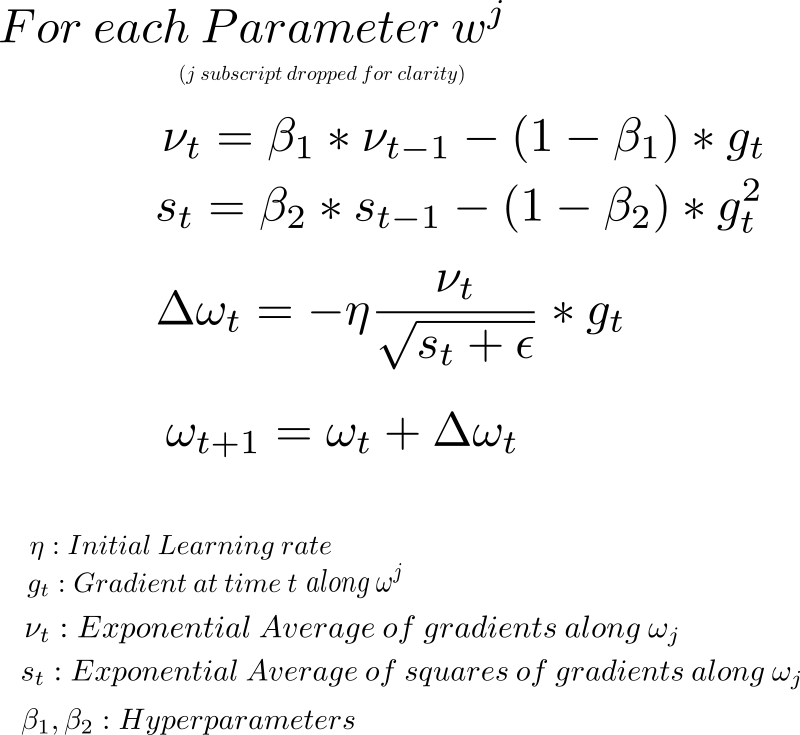

# Train Data

In [12]:
num_epochs = 1000

loss_list = np.zeros((num_epochs,))
accuracy_list = np.zeros((num_epochs,))
test_accuracy_list = np.zeros((num_epochs,))
for epoch in range(num_epochs):
    
    for i, (items, classes) in enumerate(train_loader):
        # Convert torch tensor to Variable (a dynamic variable for backward)
        items = Variable(items).float()
        classes = Variable(classes).long()
        
        net.train()  # Put the network into training mode
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss_list[epoch] = loss.item() # Record the loss for training data
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to update the parameters based on the gradients
        correct = (torch.argmax(outputs, dim=1) == classes).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

    net.eval()  # Put the network into evaluation mode    
    for test_items, test_classes in test_loader: 
        # Convert torch tensor to Variable (wrapper)
        test_items = Variable(test_items).float()
        test_classes = Variable(test_classes).long()
        with torch.no_grad(): # no gradient descent
            test_outputs = net(test_items) # forward
            test_correct = (torch.argmax(test_outputs, dim=1) == test_classes).type(torch.FloatTensor)
            test_accuracy_list[epoch] = test_correct.mean()

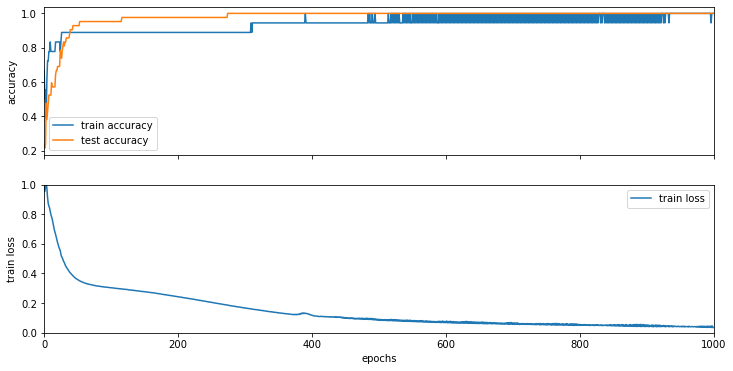

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list, label='train accuracy')
ax1.plot(test_accuracy_list, label='test accuracy')
ax1.set_ylabel("accuracy")
ax1.legend()
ax2.plot(loss_list, label='train loss')
ax2.set_ylabel("train loss")
ax2.set_xlabel("epochs")
plt.ylim((0, 1))
plt.xlim((0, num_epochs))
ax2.legend()

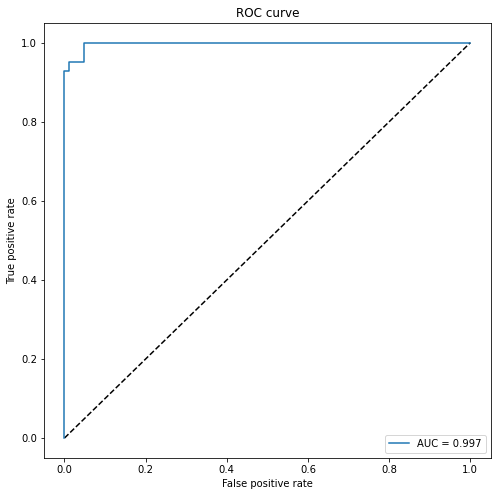

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(test_classes[:, np.newaxis]).toarray()

with torch.no_grad():
    test_outputs = net(test_items).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), test_outputs.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

### Saving the model, and loading it back

In [15]:
torch.save(net.state_dict(), "pytorch_seeds_model.pth")
net2 = seedsNet(7, 100, 50, 3)
net2.load_state_dict(torch.load("pytorch_seeds_model.pth"))

output = net2(Variable(torch.FloatTensor([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]])))
_, predicted_class = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  0
Expected class:  0
